# Benchmark Image Similarity

Author : Bayu Aditya

**Source :**

1. Paper : https://arxiv.org/abs/1710.02726
2. Hashing Image https://github.com/JohannesBuchner/imagehash
3. SIFT : https://gist.github.com/soruly/bd02a218690fe4e19295de3f5bede242#file-compre-py-L25
4. SURF : https://github.com/makelove/OpenCV-Python-Tutorial/blob/master/ch33-%E4%BB%8B%E7%BB%8DSURF/surf.py
5. ORB : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import PIL
import os
import json

import imagehash
from similarity_backup import compareSIFT, compareSURF, compareORB
from Image_Augmentation import image_augmentation

print('Matplotlib : {}'.format(mpl.__version__))
print('Numpy      : {}'.format(np.__version__))
print('OpenCV     : {}'.format(cv2.__version__))
print('PIL        : {}'.format(PIL.__version__))

Matplotlib : 3.0.1
Numpy      : 1.15.4
OpenCV     : 3.4.2
PIL        : 5.3.0


In [2]:
def display_image(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.show()

**Hash Image Tools**

In [3]:
def resize(img, shape = (120, 20)):
    #print(img.shape)
    if (len(img.shape) == 3):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    shape_new = (shape[1], shape[0])
    img = cv2.resize(img, shape_new)
    #print(img.shape)
    return img

In [4]:
def hashing_value(img):
    if (type(img) == np.ndarray):
        image = PIL.Image.fromarray(img)
    hashing = imagehash.average_hash(image)
    return hashing

In [5]:
def hashing_distance(img1, img2):
    hash1 = hashing_value(img1)
    hash2 = hashing_value(img2)
    distance = hash1 - hash2
    return distance

**SIFT Tools**

$$ MAE = \frac{1}{N} \sum_i^N\left| distance_i\right|$$
$$ RMSE = \frac{1}{N} \sum_i^N\left( distance_i\right)^2$$

In [6]:
def match_sift_distanceMAE(match):
    distance = []
    for i in range(len(match)):
        distance.append(match[i].distance)
    MAE = np.mean(np.abs(distance))
    return MAE

def match_sift_distanceRMSE(match):
    distance = []
    for i in range(len(match)):
        distance.append(match[i].distance)
    MAE = np.mean(np.square(distance))
    return MAE

## 1. Open Filename from JSON

In [7]:
DIR_IMAGE = 'image_plate_benchmark/image_bbox/'

list_name = []
for name in os.listdir(DIR_IMAGE):
    if (name[-4:] == '.jpg'):
        list_name.append(name)
    
#print(list_name)

In [8]:
data = os.listdir(DIR_IMAGE)

## 2. Key License Plate

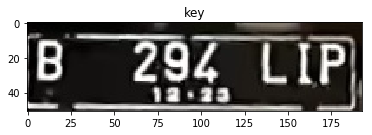

 Average Hashing : 047f9393bb1218ff


In [9]:
no = 500
name_file_key = data[no]
img_key = cv2.imread(DIR_IMAGE + name_file_key)
display_image(img_key, title = 'key')

shape_key = img_key.shape

print(' Average Hashing : {}'.format(hashing_value(img_key)))

## 3. Compare Hashing Score with Others

In [10]:
def summary_hashing_image(_img_key, _data):
    hash_dist_list = []
    image_list = []
    for i in range(len(_data)):
        name = _data[i]
        img = cv2.imread(DIR_IMAGE + name, 0)
        img = resize(img, shape = shape_key)
        hash_dist = hashing_distance(_img_key, img)
        hash_dist_list.append((i, hash_dist))
        image_list.append(img)
    
    hash_dist_list.sort(key=(lambda x : x[1]))
    rank = 0
    for i, dist in hash_dist_list[:4]:
        rank += 1
        title = 'Rank : {} Hashing Distance : {}'.format(rank, dist)
        display_image(image_list[i], title = title)

### 3.1. Target without noise

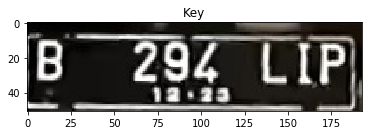

In [11]:
display_image(img_key, 'Key')

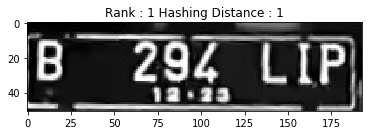

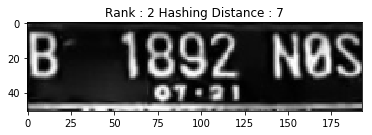

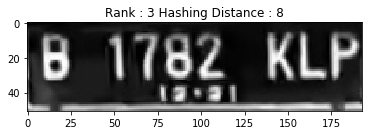

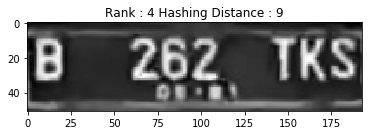

In [12]:
summary_hashing_image(img_key, data)

### 3.2. Target with noise key

In [23]:
class_aug = image_augmentation(img_key)
dict_aug = class_aug.get_result()

img_key_noise = dict_aug['get_noise']['s&p']
class_aug.param

{'get_blur': ['very_low', 'low', 'med', 'high'],
 'get_crop': ['very_low', 'low', 'med', 'high'],
 'get_intensity': ['glow', 'dark'],
 'get_noise': ['gaussian', 's&p', 'speckle'],
 'get_rotate': ['left', 'right'],
 'get_scale': ['small', 'big'],
 'get_shear': ['left', 'right'],
 'get_translate': ['up', 'down', 'right', 'left']}

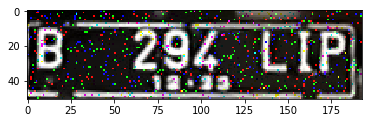

In [24]:
plt.imshow(img_key_noise,cmap = 'gray')

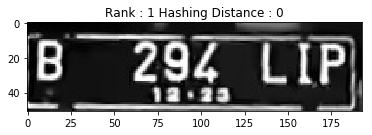

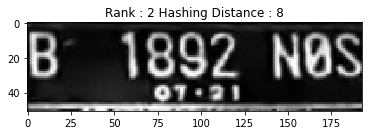

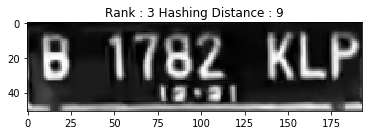

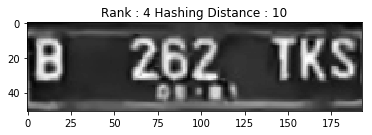

In [25]:
summary_hashing_image(img_key_noise, data)

### 3.3. Target with crop key

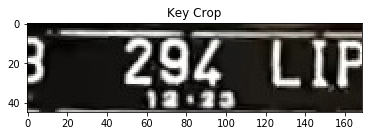

In [27]:
img_key_crop = dict_aug['get_crop']['high']

display_image(img_key_crop, 'Key Crop')

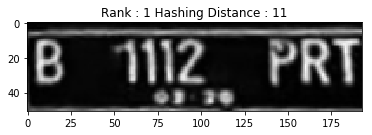

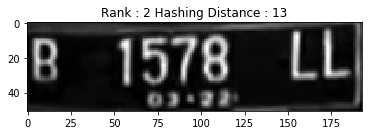

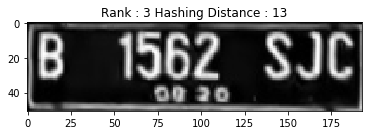

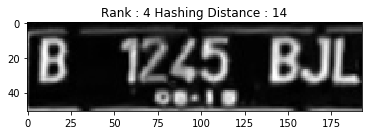

In [28]:
summary_hashing_image(img_key_crop, data)

## 4. SIFT

In [29]:
def summary_SIFT(_img_key, _data):
    sift_dist_list = []
    image_list = []
    for i in range(len(_data)):
        name = _data[i]
        img = cv2.imread(DIR_IMAGE + name, 0)
        #img = resize(img, shape = shape_key)
        match = compareSIFT(_img_key, img)
        sift_dist = match_sift_distanceMAE(match)
        sift_dist_list.append((i, sift_dist))
        image_list.append(img)
    
    sift_dist_list.sort(key=(lambda x : x[1]))
    rank = 0
    for i, dist in sift_dist_list[:4]:
        rank += 1
        title = 'Rank : {} SIFT MAE : {}'.format(rank, dist)
        display_image(image_list[i], title = title)

### 4.1. SIFT with key

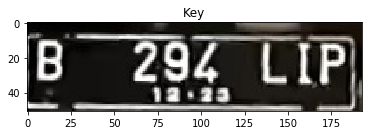

In [30]:
display_image(img_key, 'Key')

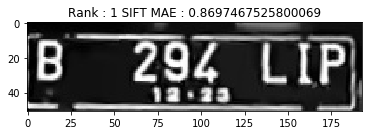

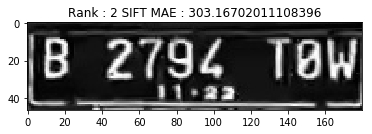

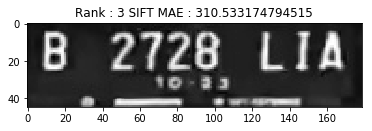

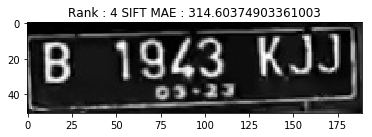

In [31]:
summary_SIFT(img_key, data)

### 4.2. SIFT with noise key

In [32]:
class_aug.param

{'get_blur': ['very_low', 'low', 'med', 'high'],
 'get_crop': ['very_low', 'low', 'med', 'high'],
 'get_intensity': ['glow', 'dark'],
 'get_noise': ['gaussian', 's&p', 'speckle'],
 'get_rotate': ['left', 'right'],
 'get_scale': ['small', 'big'],
 'get_shear': ['left', 'right'],
 'get_translate': ['up', 'down', 'right', 'left']}

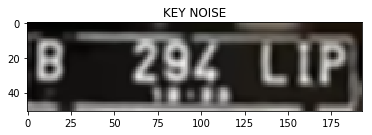

In [33]:
class_aug = image_augmentation(img_key)
dict_aug = class_aug.get_result()
img_key_noise = dict_aug['get_blur']['high']

display_image(img_key_noise, 'KEY NOISE')

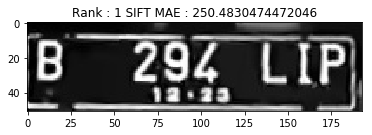

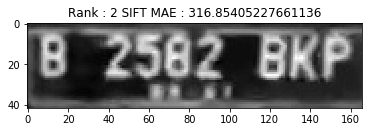

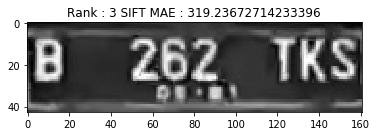

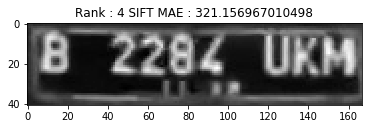

In [34]:
summary_SIFT(img_key_noise, data)

### 4.3. SIFT with crop key

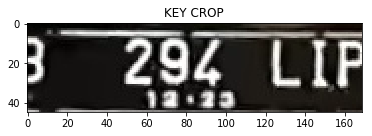

In [35]:
img_key_crop = dict_aug['get_crop']['high']
display_image(img_key_crop, 'KEY CROP')

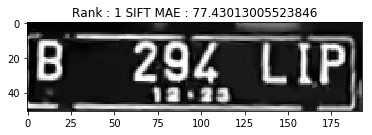

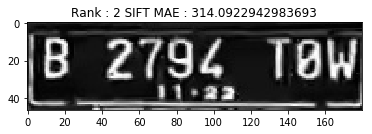

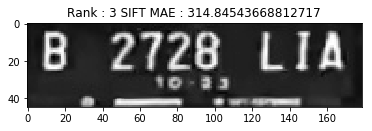

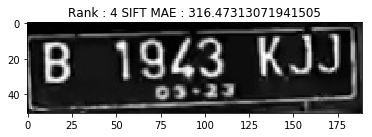

In [36]:
summary_SIFT(img_key_crop, data)

### 4.4. SIFT with rotate key

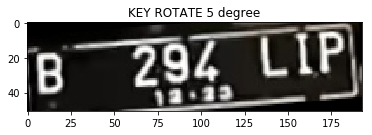

In [38]:
img_key_rotate = dict_aug['get_rotate']['left']
display_image(img_key_rotate, 'KEY ROTATE {} degree'.format(5))

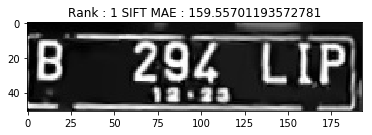

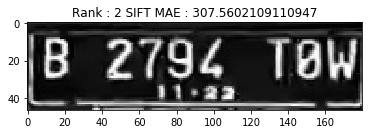

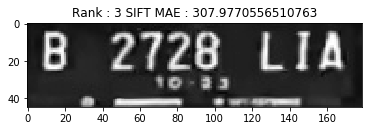

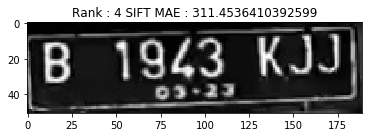

In [39]:
summary_SIFT(img_key_rotate, data)

## 5. SURF

In [40]:
def summary_SURF(_img_key, _data):
    sift_dist_list = []
    image_list = []
    for i in range(len(_data)):
        name = _data[i]
        #img = cv2.imread(DIR_IMAGE + name, 0)
        img = cv2.imread(DIR_IMAGE + name)
        match = compareSURF(_img_key, img)
        sift_dist = match_sift_distanceMAE(match)
        sift_dist_list.append((i, sift_dist))
        image_list.append(img)
    
    sift_dist_list.sort(key=(lambda x : x[1]))
    rank = 0
    for i, dist in sift_dist_list[:4]:
        rank += 1
        title = 'Rank : {} SURF MAE : {}'.format(rank, dist)
        display_image(image_list[i], title = title)

### 5.1. SURF with key

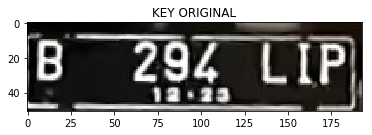

In [41]:
display_image(img_key, 'KEY ORIGINAL')

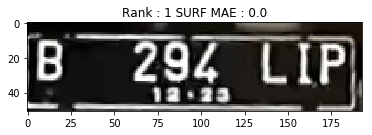

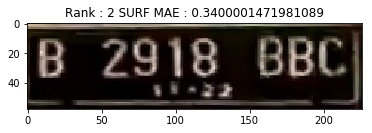

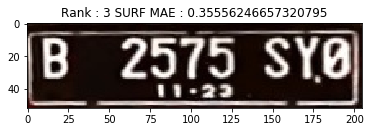

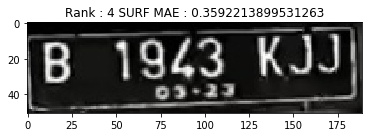

In [42]:
summary_SURF(img_key, data)

### 5.2. SURF with noise key

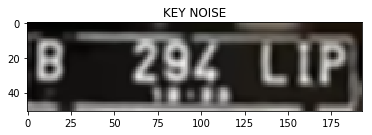

In [43]:
display_image(img_key_noise, 'KEY NOISE')

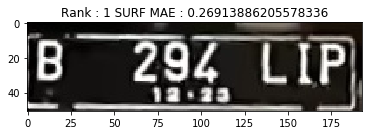

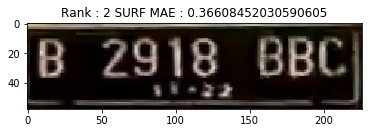

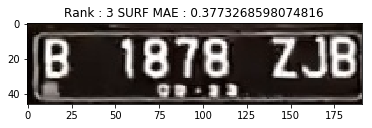

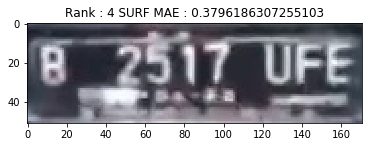

In [44]:
summary_SURF(img_key_noise, data)

### 5.3. SURF with crop key

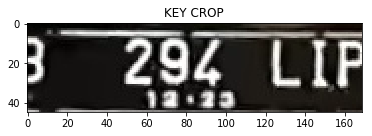

In [45]:
display_image(img_key_crop, 'KEY CROP')

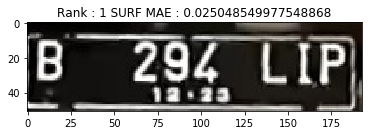

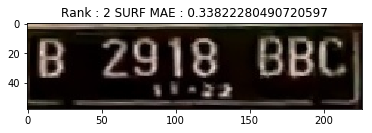

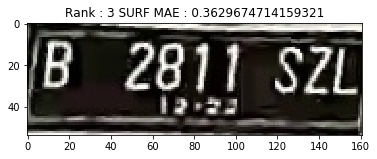

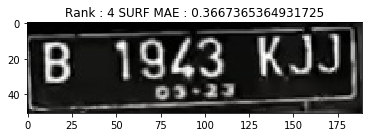

In [46]:
summary_SURF(img_key_crop, data)

### 5.4. SURF with rotate key

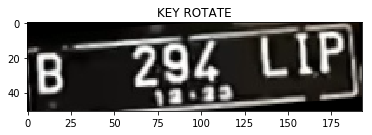

In [47]:
display_image(img_key_rotate, 'KEY ROTATE')

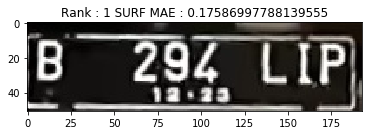

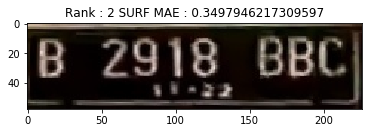

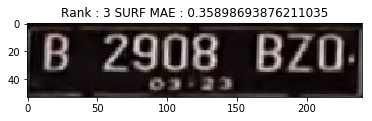

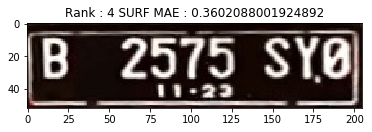

In [48]:
summary_SURF(img_key_rotate, data)